In [57]:
import tensorflow as tf
import numpy as np

from tensorflow import keras
from keras import layers
from keras import activations

import matplotlib.pyplot as plt

(x_train, y_raw_train), (x_test, y_raw_test) = tf.keras.datasets.cifar10.load_data()

## let's take a very small snapshot of this data say 200 images

In [58]:
def one_hot_encoding(labels):
    one_hot = tf.one_hot(labels, classes_no, dtype=tf.float32)
    return tf.reshape(one_hot, (labels.shape[0], classes_no))

train_size = 50000
test_size = 100
classes_no = 10

x_train, y_train = x_train[:train_size], one_hot_encoding(y_raw_train[:train_size])
x_test, y_test = x_train[:test_size], one_hot_encoding(y_raw_train[:test_size])

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float32)


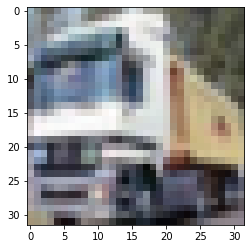

In [59]:
print(y_train[1])
plt.imshow(x_train[1])

In [60]:
model = keras.Sequential([
    layers.Rescaling(scale=1./255.),
    layers.Conv2D(
        5, (3, 3),
        strides=1,
        padding='same',
        activation=activations.sigmoid
    ),
    layers.Conv2D(
        5, (3, 3),
        strides=1,
        padding='same',
        activation=activations.sigmoid
    ),
    layers.MaxPooling2D(pool_size=(8, 8),
                        strides=(8, 8),
                        padding='same'
    ),
    layers.Flatten(),
    layers.Dense(10, activation=activations.softmax)
])


model.build([None, 32, 32, 3])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_10 (Rescaling)     (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 5)         140       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 5)         230       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 5)           0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 80)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                810       
Total params: 1,180
Trainable params: 1,180
Non-trainable params: 0
___________________________________________________

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=.9)
loss_fn = tf.keras.losses.CategoricalCrossentropy()

model.compile(loss=loss_fn,optimizer=optimizer, metrics=[keras.metrics.CategoricalAccuracy()])
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=150,
                    validation_data=(x_test, y_test))


Epoch 1/150
782/782 [==============================] - 12s 14ms/step - loss: 2.3093 - categorical_accuracy: 0.0952 - val_loss: 2.3031 - val_categorical_accuracy: 0.1100

 - Time to learn: 150 * 10s = 1500s = 25 minutes .. (trained on cpu)

In [68]:
print(history.history)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

{'loss': [2.3092942237854004, 2.303025245666504, 2.302651882171631, 2.3023900985717773, 2.301642417907715, 2.301100015640259, 2.3003671169281006, 2.2994980812072754, 2.298072099685669, 2.2965149879455566, 2.2939724922180176, 2.2903215885162354, 2.2847957611083984, 2.2756810188293457, 2.260155200958252, 2.234788656234741, 2.1974689960479736, 2.153411626815796, 2.11202073097229, 2.0782382488250732, 2.051377058029175, 2.0278310775756836, 2.0056891441345215, 1.9839251041412354, 1.962573766708374, 1.9417295455932617, 1.9216128587722778, 1.902087688446045, 1.8834432363510132, 1.865230679512024, 1.8476711511611938, 1.8310527801513672, 1.8155741691589355, 1.8017468452453613, 1.7894638776779175, 1.7781506776809692, 1.7678234577178955, 1.7588731050491333, 1.7508188486099243, 1.7431578636169434, 1.736197829246521, 1.729719638824463, 1.7239224910736084, 1.7184799909591675, 1.7132093906402588, 1.708388328552246, 1.703575611114502, 1.6993719339370728, 1.6951470375061035, 1.6912814378738403, 1.687206

In [88]:
print(history.history.keys())
np.save('history/part_one.npy',history.history)

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


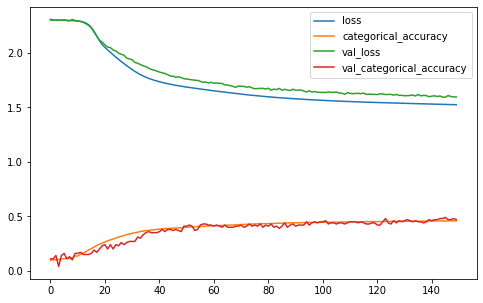

In [72]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

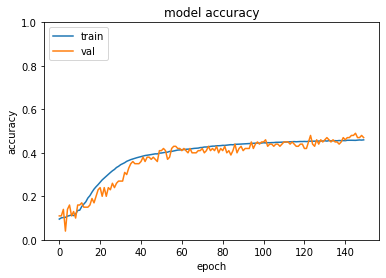

In [85]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
ax = plt.gca()
ax.set_ylim([0.0, 1.0])
plt.show()

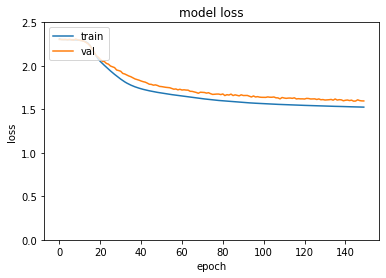

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
ax = plt.gca()
ax.set_ylim([0.0, 2.5])
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [81]:
q = model.predict(np.array([x_test[1]]))[0]
q

array([0.04068607, 0.44625667, 0.01564505, 0.01262672, 0.00363214,
       0.02808936, 0.00248   , 0.01905501, 0.07732841, 0.35420057],
      dtype=float32)

In [83]:
tf.reduce_max(q)

<tf.Tensor: shape=(), dtype=float32, numpy=0.44625667>

In [94]:
retrieved_history = np.load('history/part_one.npy', allow_pickle='TRUE').item()